In [1]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'vocal']
source_names=['acoustic', 'electronic', 'synthetic']

In [3]:
with open('pickles/df_features_test.pickle', 'rb') as f:
    df_features = pickle.load(f)
    
with open('pickles/filenames_test.pickle', 'rb') as f:
    filenames = pickle.load(f)

with open('pickles/random_search_RF.pickle', 'rb') as f:
    model = pickle.load(f)

In [4]:
X_test = df_features.drop(labels=['targets'], axis=1)
y_test = df_features['targets']

In [104]:
def plot (pred):
    y_pos = np.arange(len(class_names))
    x = np.mean(pred['data'], axis=0)
    
    plt.figure(figsize=(20,10)) 
    plt.bar(y_pos, x, align='center', alpha=0.5)
    plt.xticks(y_pos, class_names)
    plt.ylabel('Probability')
    
    plt.title(pred['instrument']+', '+pred['source'])
    plt.savefig('plots/{}.png'.format(pred['instrument']+'_'+pred['source']))
    plt.show()

In [101]:
def predict (inst, source):
    pred = {}
    
    # get subset
    target = '{}_{}'.format(inst, source)
    subset = X_test[X_test.index.str.contains(target)]
    
    # run prediction
    if not subset.empty:
        pred['data'] = model.predict_proba (subset)
    else:
        pred['data'] = np.array([])
    pred['instrument'] = inst
    pred['source'] = source
    
    return pred

In [103]:
pred_list = []

for c in class_names:
    for s in source_names:
        pred = predict (c,s)
        if pred['data'].size > 0:
            pred_list.append(pred)
        else:
            print('dropping {}_{}'.format(c,s))
        
print (pred_list)
        

dropping bass_acoustic
dropping brass_electronic
dropping brass_synthetic
dropping flute_electronic
dropping guitar_synthetic
dropping mallet_electronic
dropping mallet_synthetic
dropping organ_acoustic
dropping organ_synthetic
dropping reed_electronic
dropping reed_synthetic
dropping string_electronic
dropping string_synthetic
dropping vocal_electronic
[{'data': array([[0.47421958, 0.        , 0.00208333, ..., 0.        , 0.0042328 ,
        0.        ],
       [0.50285053, 0.        , 0.00277778, ..., 0.00694444, 0.03244048,
        0.        ],
       [0.48314815, 0.        , 0.00555556, ..., 0.0047619 , 0.03988095,
        0.        ],
       ...,
       [0.71638889, 0.        , 0.02222222, ..., 0.        , 0.00541667,
        0.        ],
       [0.33981481, 0.00833333, 0.        , ..., 0.01944444, 0.16452381,
        0.00238095],
       [0.42568122, 0.        , 0.01875   , ..., 0.        , 0.00185185,
        0.        ]]), 'instrument': 'bass', 'source': 'electronic'}, {'data': 

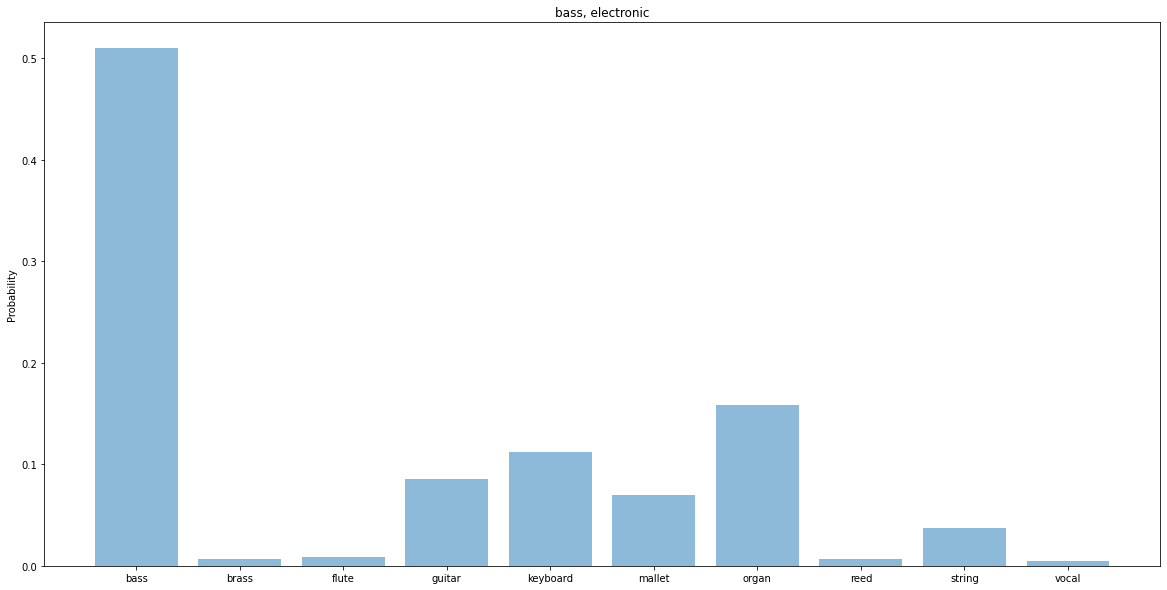

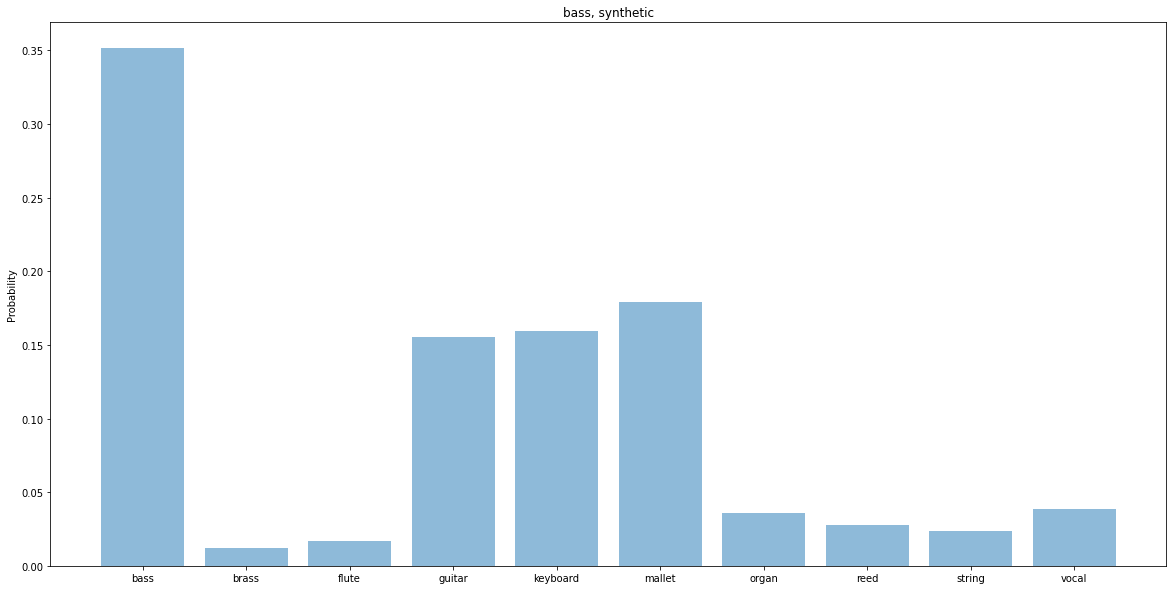

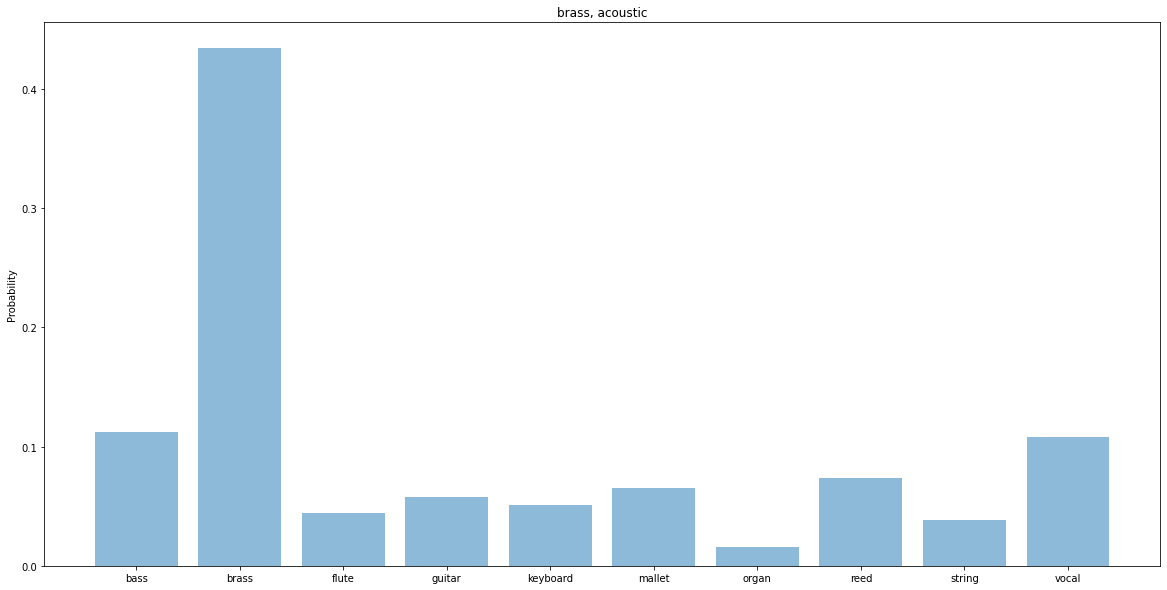

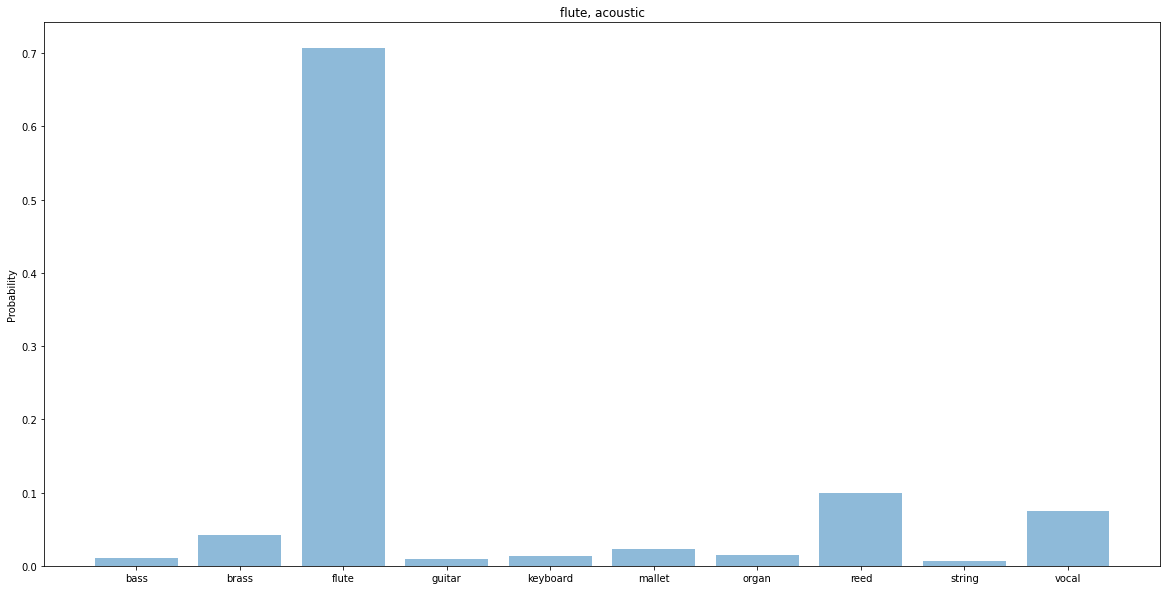

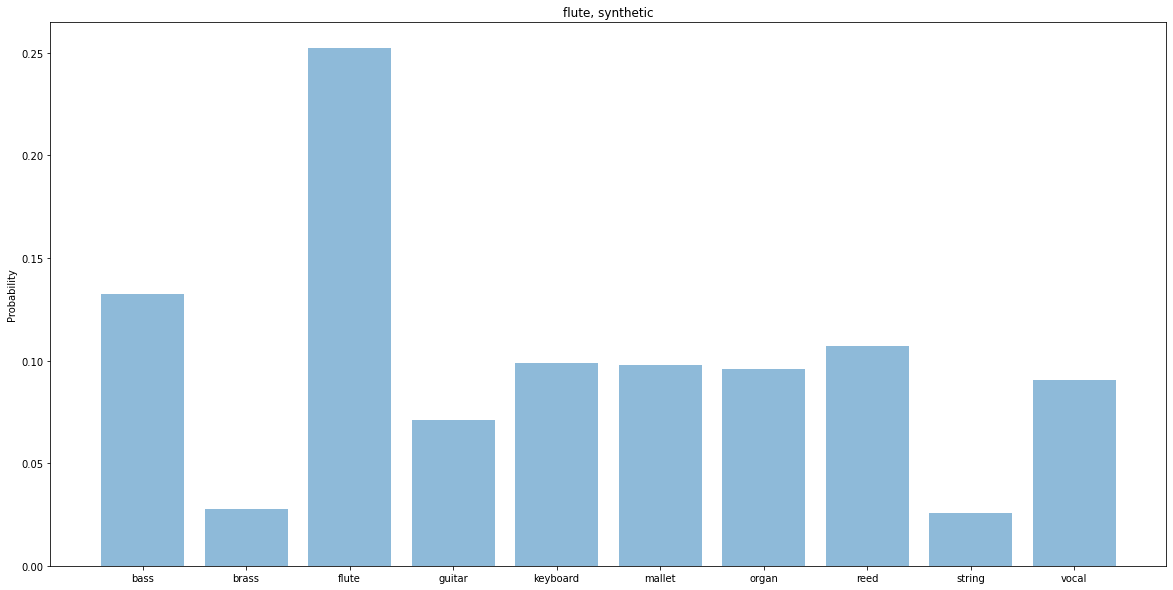

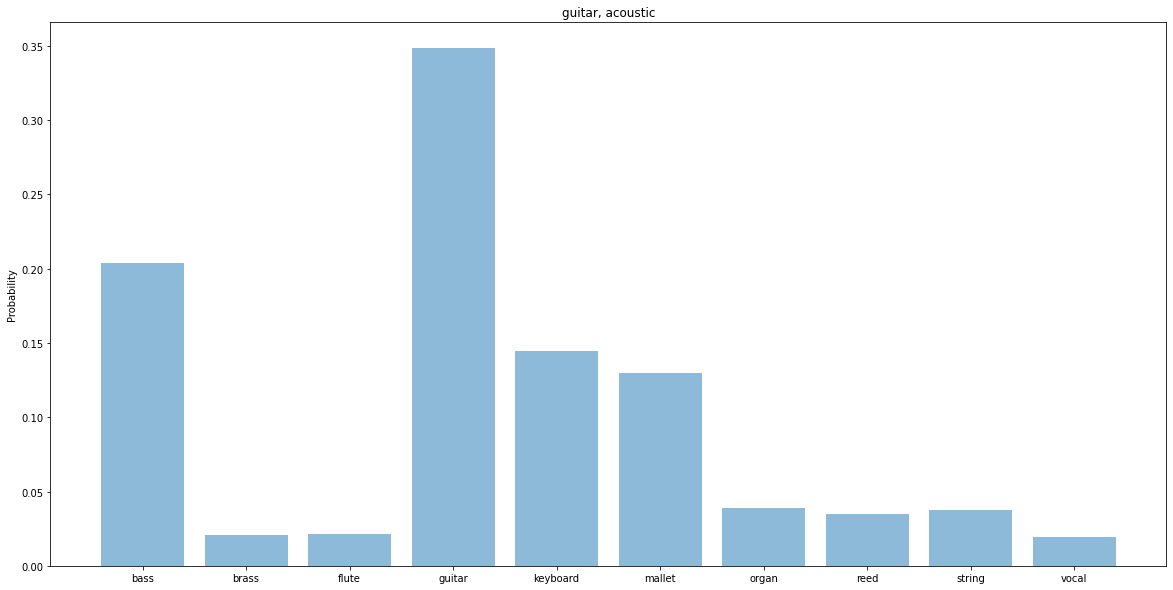

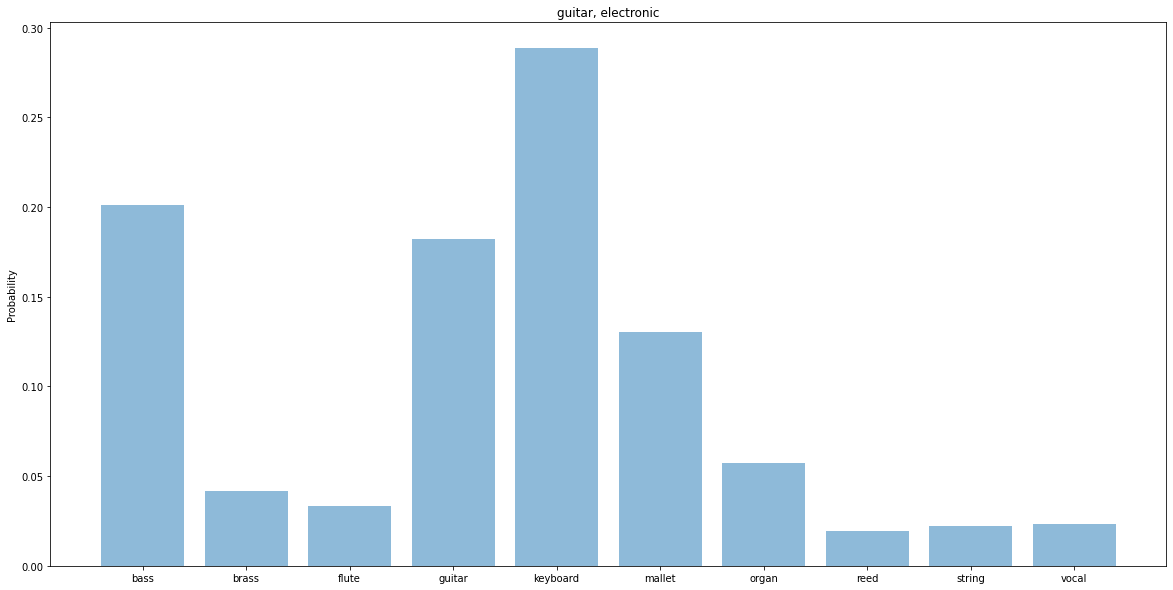

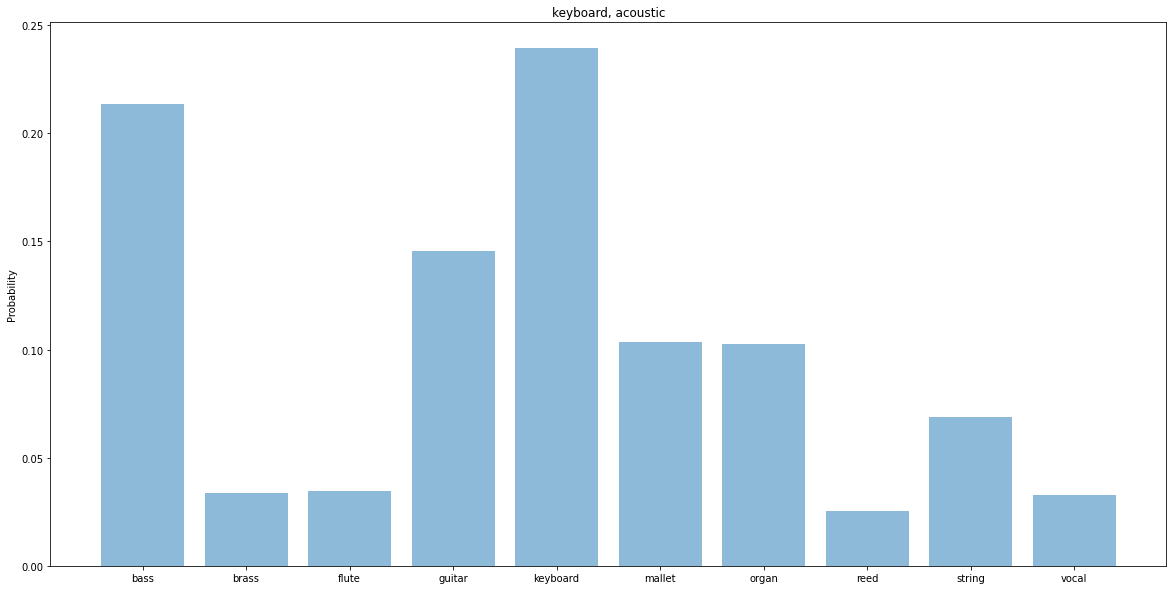

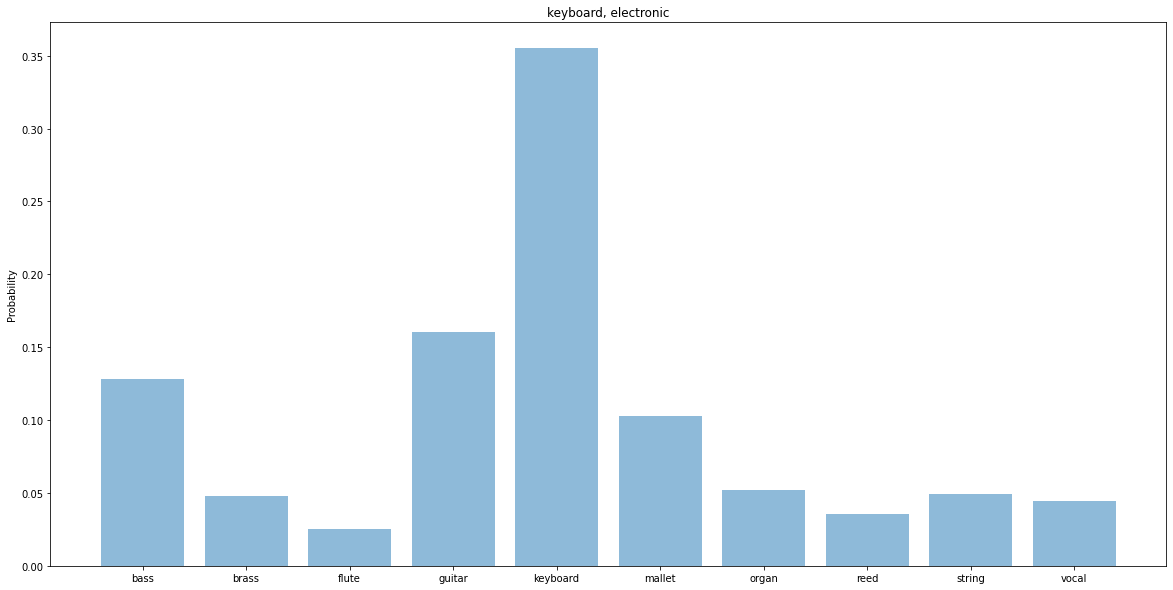

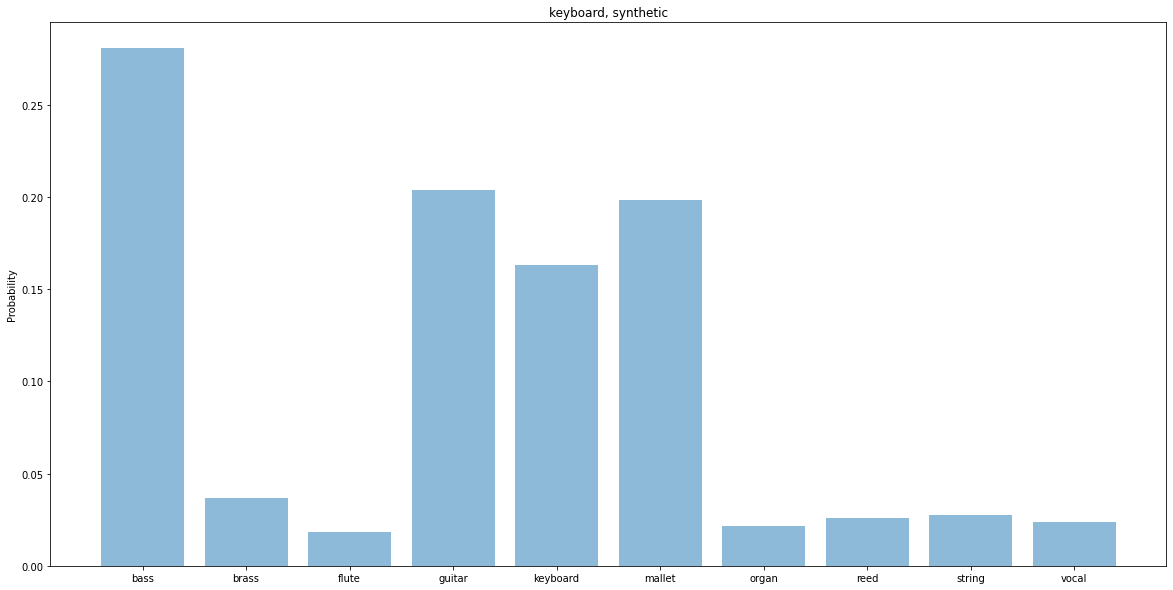

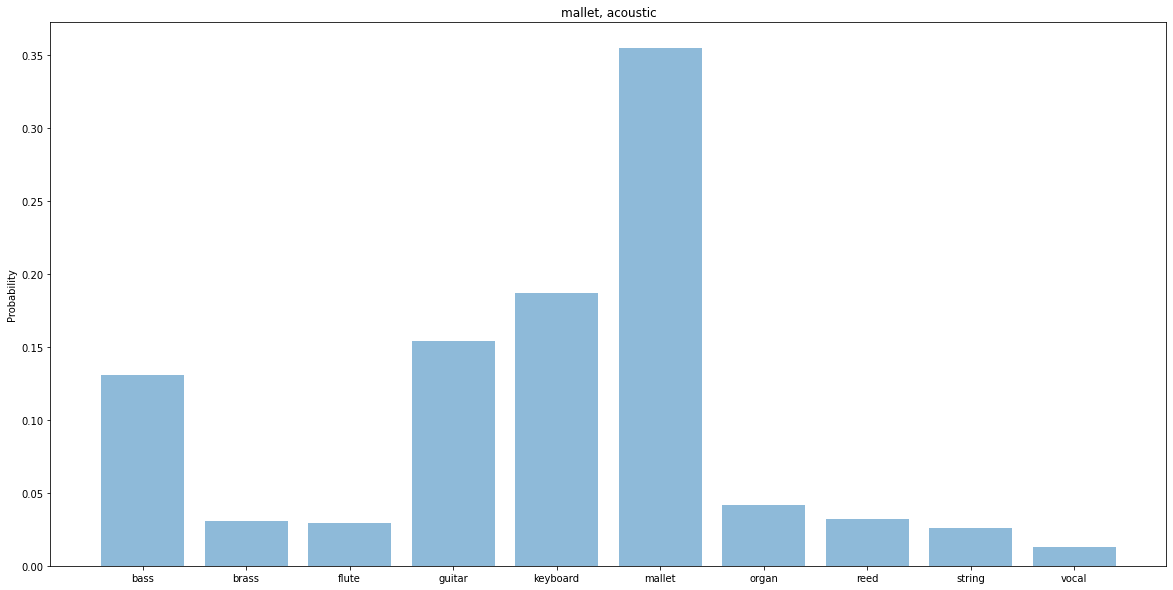

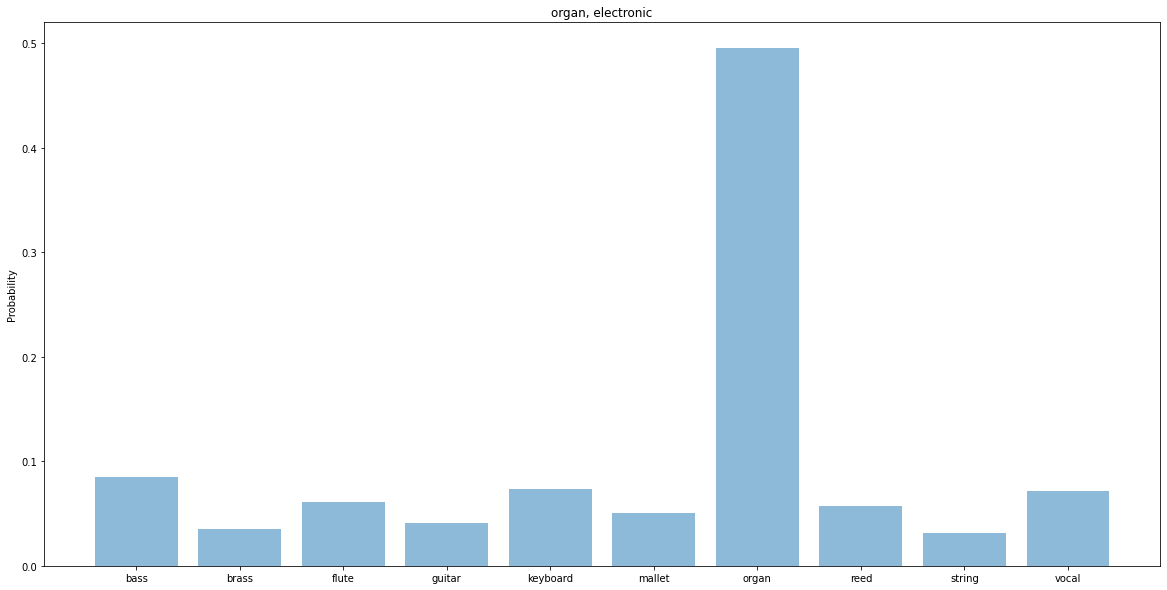

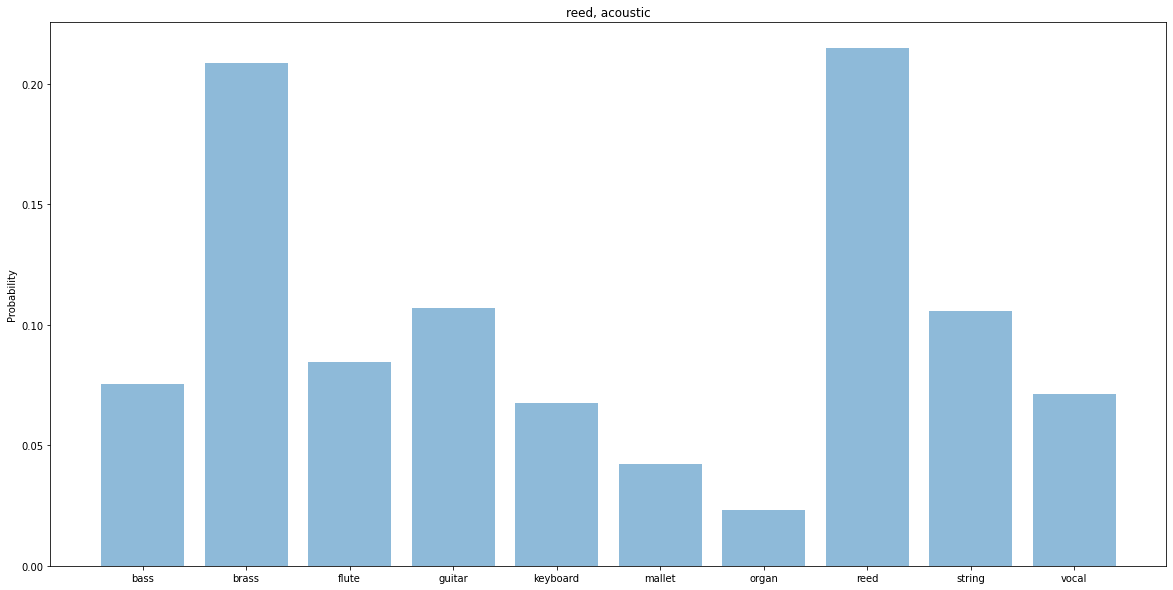

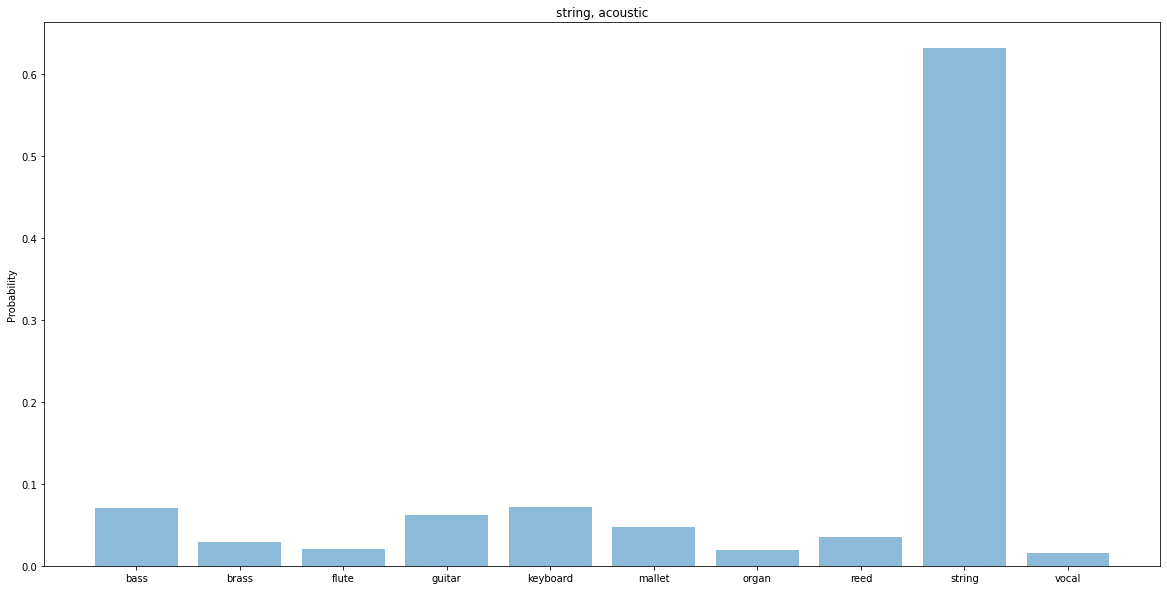

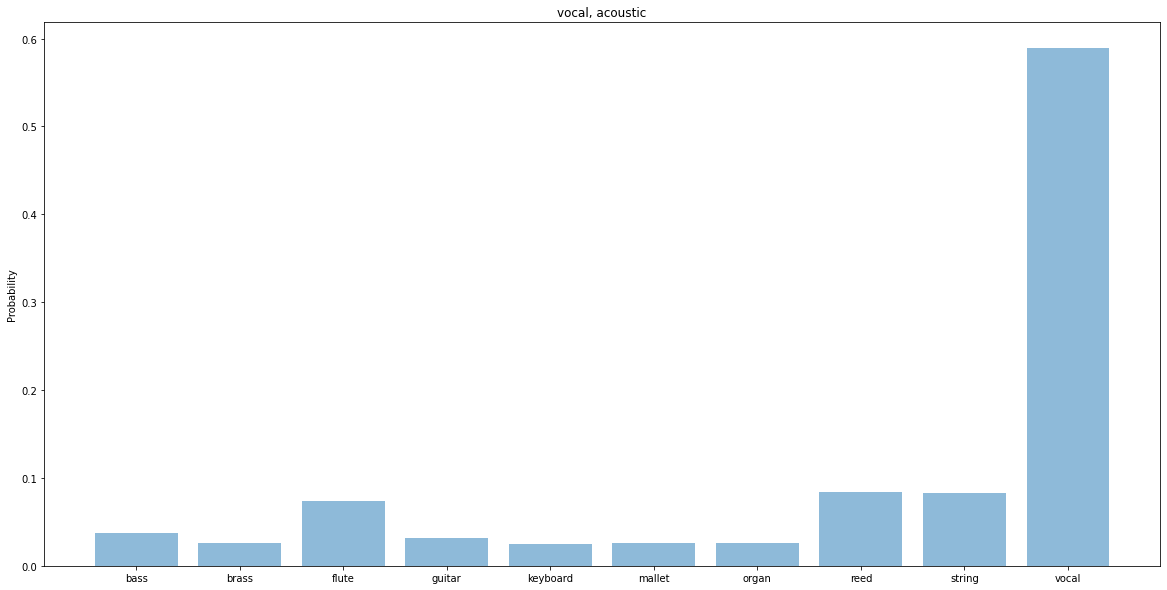

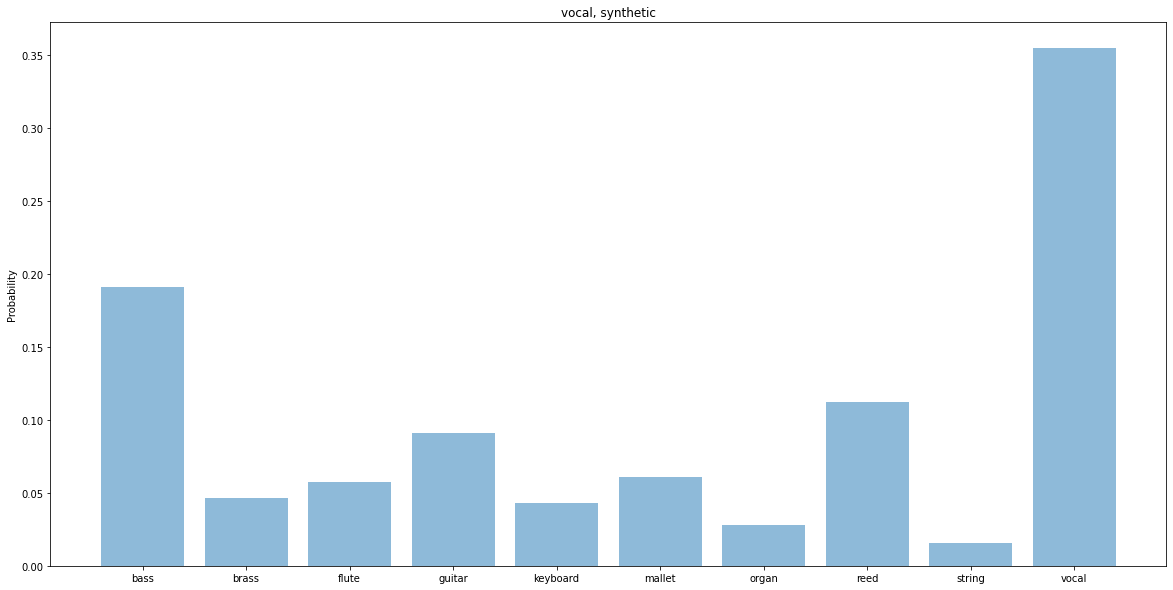

In [105]:
for pred in pred_list:
    plot(pred)